# DeepVO

Training and testing script for google colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
     https://colab.research.google.com/github/jhindel/Duckietown_VO_DeepLearning/blob/jh/deepvo/colab_train_compact.ipynb)

Clone github repo

In [1]:
!rm -r Duckietown_VO_DeepLearning
!git clone -b jh/deepvo https://github.com/jhindel/Duckietown_VO_DeepLearning.git

rm: cannot remove 'Duckietown_VO_DeepLearning': No such file or directory
Cloning into 'Duckietown_VO_DeepLearning'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 95 (delta 48), reused 60 (delta 22), pack-reused 0
Unpacking objects: 100% (95/95), done.


Mount data folders 

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


Check GPU and Import modules

In [2]:
# !pip uninstall -y Pillow
# install the new one
# !pip install Pillow==5.3.0
# import the new one
import PIL
# print(PIL.PILLOW_VERSION)
# capture
!pip install wandb --upgrade

import tensorflow as tf
tf.test.gpu_device_name()

%matplotlib inline

# http://pytorch.org/
from os.path import exists
# from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
# cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
# accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

# load tqdm
# !pip install --force https://github.com/chengs/tqdm/archive/colab.zip

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 140 kB 46.9 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 180 kB 42.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=ce0916406dd5538ed4b23b2b881c7ee6b1a1fd96f444dbb28c347a67beb7f114
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=26584ffbe434d0d09f26212c5a7295b0e2925310a174a6ec12ec0f013bbd4dd1
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


Log into wandb

In [3]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

Import modules

In [16]:
import os
print(os.listdir("drive/MyDrive/data"))
from Duckietown_VO_DeepLearning.src.dataset_split import train, val, test, test_dummy, train_dummy, val_dummy
from Duckietown_VO_DeepLearning.src.main import hyperparamter_tuning, training_testing

['razor_2big_loops_ground_truth.txt', 'razor_1small_8_ground_truth.txt', 'razor_test_incomplet_ground_truth.txt', 'alex_train_complex_2_ground_truth.txt', 'alex_2small_8_retest_ground_truth.txt', 'alex_2small_loops_ground_truth.txt', 'alex_test_complex_2_ground_truth.txt', 'alex_3small_loops_ground_truth.txt', 'razor_2x3small_loops_ground_truth.txt', 'alex_2small_loops.bmp', 'razor_2big_loops.bmp', 'alex_2small_8_retest.bmp', 'alex_3small_loops.bmp', 'alex_train_complex_2.bmp', 'razor_1small_8.bmp', 'alex_test_complex_2.bmp', 'razor_2x3small_loops.bmp', 'razor_test_incomplet.bmp', 'razor_test_incomplet_images', 'razor_2x3small_loops_images', 'alex_test_complex_2_images', 'razor_1small_8_images', 'alex_2small_8_retest_images', 'alex_train_complex_2_images', 'alex_3small_loops_images', 'alex_2small_loops_images', 'razor_2big_loops_images']


Hyperparameter Fine-Tuning

0/1:  {'data_dir': 'drive/MyDrive/data/', 'train_split': {'filenames': ['alex_2small_loops_ground_truth.txt'], 'dir': ['alex_2small_loops_images'], 'idx': [[0, 40]]}, 'val_split': {'filenames': ['alex_2small_loops_ground_truth.txt'], 'dir': ['alex_2small_loops_images'], 'idx': [[40, 50]]}, 'test_split': {'filenames': ['alex_2small_loops_ground_truth.txt'], 'dir': ['alex_2small_loops_images'], 'idx': [[50, 60]]}, 'checkpoint_path': './checkpoint', 'checkpoint': None, 'bsize': 2, 'lr': 0.001, 'weight_decay': 0.0001, 'trajectory_length': 5, 'dropout_p': 0.85, 'resize': 64, 'K': 100, 'epochs': 5, 'patience': 40, 'camera-correction': True}


final shape (41, 5) batches 8 trajectory_length 5
final shape (11, 5) batches 2 trajectory_length 5
final shape (11, 5) batches 2 trajectory_length 5
Number of parameters: 15.14M
Number of parameter bytes: 484.55M
Epoch 1/5; 

  0%|          | 0/4 [00:00<?, ?it/s]

train loss, 36.9518; 

  0%|          | 0/1 [00:00<?, ?it/s]

val loss, 3.6467.
Epoch 2/5; 

  0%|          | 0/4 [00:00<?, ?it/s]

train loss, 33.0721; 

  0%|          | 0/1 [00:00<?, ?it/s]

val loss, 2.9890.
Epoch 3/5; 

  0%|          | 0/4 [00:00<?, ?it/s]

train loss, 31.1612; 

  0%|          | 0/1 [00:00<?, ?it/s]

val loss, 2.8231.
Epoch 4/5; 

  0%|          | 0/4 [00:00<?, ?it/s]

train loss, 25.3546; 

  0%|          | 0/1 [00:00<?, ?it/s]

val loss, 10.0872; patience, 1.
Epoch 5/5; 

  0%|          | 0/4 [00:00<?, ?it/s]

train loss, 24.3383; 

  0%|          | 0/1 [00:00<?, ?it/s]

val loss, 5.2700; patience, 2.

Training complete in 0m 19s.

Best result at epoch 3; training loss, 31.1612; validation loss, 2.8231.

Graphic:


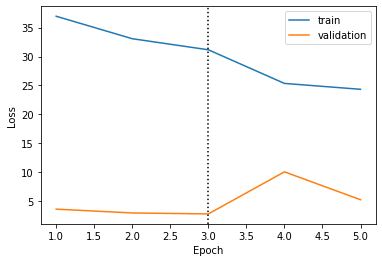

{'train_loss': [36.95177459716797, 33.072139263153076, 31.161223888397217, 25.354561805725098, 24.338327646255493], 'val_loss': [3.646653652191162, 2.9889988899230957, 2.823060989379883, 10.087204933166504, 5.270029067993164], 'trained_epochs': 5, 'best_epoch': 3}
TESTING


  0%|          | 0/2 [00:00<?, ?it/s]

test loss: 7.7102


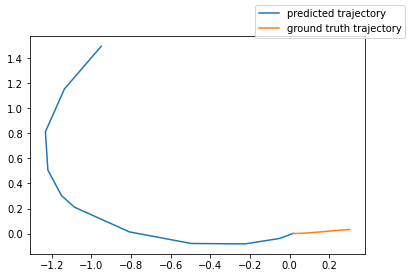

train_loss,█▆▅▂▁
val_loss,▂▁▁█▃
test_loss,7.71018
train_loss,24.33833
val_loss,5.27003


In [17]:
args ={"data_dir":("drive/MyDrive/data/",),
    "train_split":(train_dummy,), "val_split":(val_dummy,), "test_split":(test_dummy,),
    "checkpoint_path":('./checkpoint',), "checkpoint":(None,), "bsize":(2,), "lr":(0.001,),
    "weight_decay":(1e-4,), "trajectory_length":(5,), "dropout_p":(0.85,),
    "resize":(64,), "K":(100,), "epochs":(5,), "patience":(40,), "camera-correction":(True,)}

hyperparamter_tuning(args, wandb_project="deepvo-finetuning-trial", visualization=True, wandb_name="trial_runs")

Running selected Configuration with Graphs

In [ ]:

args ={"data_dir":"drive/MyDrive/data/",
    "train_split":train_dummy, "val_split":val_dummy, "test_split":test_dummy,
    "checkpoint_path":'./checkpoint', "checkpoint":None, "bsize":2, "lr":0.001, 
    "weight_decay":1e-4, "trajectory_length":5, "dropout_p":0.85,
    "resize":64, "K":100, "epochs":5, "patience":40, "camera-correction":True}

training_testing(args, wandb_project="deepvo-finetuning-trial", visualization=True, wandb_name="trial_runs")